In [3]:
%run lm_ode.ipynb

In [4]:
import matplotlib.pyplot as plt

# Soft line search
## Derivative of the objective function
The variation of the objective function $S$ along the direction $\mathbf{h}$ is
$$\phi(\alpha)=S(\mathbf{k}+\alpha\mathbf{h})$$
Taylor expansion is
$$\phi(\alpha)=S(\mathbf{k})+\alpha\mathbf{h^\top f'(k)}+\frac{1}{2}\alpha^2\mathbf{h^\top f''(k)h}+\mathcal{O}(\alpha^3)$$
and its derivative is
$$\phi'(\alpha)=\mathbf{h^\top f'(k)}+\alpha\mathbf{h^\top f''(k)}+\mathcal{O}(\alpha^2)$$
so that
$$\phi'(0)=\mathbf{h^\top f'(k)}.$$

## Descent methods and stability
The descent condition $S(\mathbf{k}^{(k+1)})<S(\mathbf{k}^{(k)})$ is not satisfactory since it allows negligible reduction in $S$. Hence, with the interval $[a,b]$ of $\alpha$ which gives the descent condition, the aim of the line search is to find a step $\alpha^{(k)}$ which results in a significant redunction in $S$ by excluding left and right extremes of the interval.

## Conditions of line search
To exclude the right extreme, with a decreasing line $\lambda(\alpha)=\phi(0)+\rho\phi'(0)\alpha$ with $0<\rho<0.5$, the condition is
\begin{equation}
\phi(\alpha)\leq\lambda(\alpha)
\end{equation}
and ensure $\alpha$ is not chosen too small (exclude the left extreme), the local slope is greater than (equivalent to less steep since slope is negative) the starting slope.
\begin{equation}
\phi'(\alpha)\geq\sigma\phi'(0),\hspace{10mm}\rho<\sigma<1
\end{equation}
These two conditions are Wolfe-Powell conditions (Fletcher, 2000).
Two sided condition
\begin{equation}
\vert\phi'(\alpha)\vert\leq-\sigma\phi'(0)
\end{equation}
is preferred since the acceptable points given by Wolfe-Powell condtions may not be close to the optimum value. 

## Algorithms for soft line search
Soft line search has two distinct parts. First comes the bracketing phase follwed by the sectioning phase. In case the $\phi$ does not meet the $\lambda$ line, the lower bound $\bar{\phi}$ on $\phi(\alpha)$ is supplied by the user. For least squares problem, $\bar{\phi}=0$ is appropriate.
### Bracketing phase


\begin{align}
\text{wh}&\text{ile }found=false\\
         &\text{evaluate }\phi(\alpha_i)\\
         &\text{if }\phi(\alpha_i)\leq\bar{\alpha}\\
         &\hspace{10mm}found=true\\
         &\text{if }\phi(\alpha_i)>\phi(0)+\alpha_i\phi'(0)\text{ or }\phi(
\end{align}


In [2]:
def slinesearch(g,beta,amax):
    if g>=0.0:
        alpha = 0
    else:
        it = 0
        gamma = beta*g
        a = 0; b = min(1,amax)
        

<function __main__.dfdy_ode(ode, y, k, n)>

### Rosenbrock's function
$$f(\mathbf{x})=100(x_2-x_1^2)^2+(1-x_1)^2$$

In [8]:
def rosenbrock(x1,x2):
    return 100*(x2-x1**2)**2+(1-x1)**2

In [16]:
x = np.linspace(-1.5,1.5,100)
y = np.linspace(-0.5,1.5,100)
X,Y = np.meshgrid(x,y)

In [17]:
Z = rosenbrock(X,Y)

In [14]:
levels = [0.0,0.5,1,2,4,8,16,32]

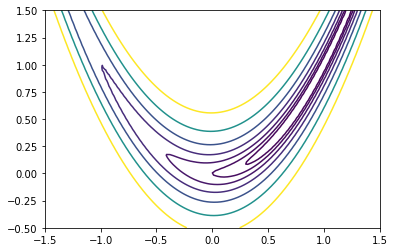

In [18]:
plt.contour(X,Y,Z,levels)

### $f(\alpha)$
With $\mathbf{x}^{(k)}=\mathbf{0}$ and $\mathbf{s}^{(k)}=\begin{bmatrix}0&1\end{bmatrix}^\top$, $f(\alpha)=100\alpha^4+(1-\alpha)^2$